In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.utils import resample

from sklearn.datasets import make_circles

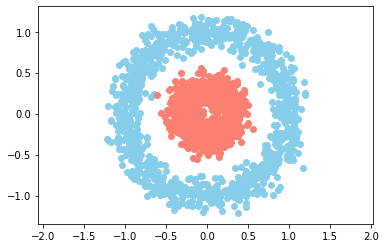

In [2]:
#CREAR EL DATASET

n = 2000
p = 2

x,y = make_circles(n_samples=n, factor=0.3, noise = 0.1)
x2,y2 = make_circles(n_samples=n, factor=0.35, noise = 0.35)
y = y[:, np.newaxis]
y2 = y2[:, np.newaxis]

plt.scatter(x[y[:,0]==0,0], x[y[:,0]==0,1], c='skyblue')
plt.scatter(x[y[:,0]==1,0], x[y[:,0]==1,1], c='salmon')
plt.axis('equal')
plt.show()


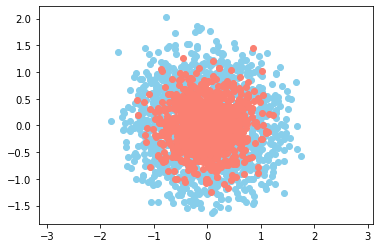

In [3]:
plt.scatter(x2[y2[:,0]==0,0], x2[y2[:,0]==0,1], c='skyblue')
plt.scatter(x2[y2[:,0]==1,0], x2[y2[:,0]==1,1], c='salmon')
plt.axis('equal')
plt.show()

In [302]:
#CLASE DE LA CAPA DE LA RED

class layer():
    
    def __init__(self, n_conn, n_neur, act_f):
        
        self.act_f = act_f
        
        self.b = np.random.normal(0, np.sqrt(2/(n_conn+n_neur)), n_neur ).reshape(1, n_neur)
        self.w = np.random.normal(0, np.sqrt(2/(n_conn+n_neur)), n_conn * n_neur ).reshape(n_conn, n_neur)


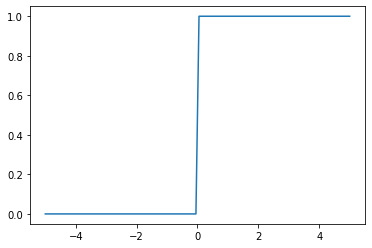

In [303]:
#FUNCIONES DE ACTIVACIÓN

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = (lambda x: np.maximum(0, x),
        lambda x: np.greater(x,0).astype('int'))

_x = np.linspace(-5,5,100)
plt.plot(_x, relu[1](_x))

In [304]:
relu[1](1)

1

In [305]:
#CREO LA RED CAPA A CAPA

nn = []
nn.append(layer(2,4,relu))
nn.append(layer(4,8,relu))
nn.append(layer(8,1,sigm))

In [306]:
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

In [307]:
def train(nn, x, y, f_loss, lr=0.5, train=True):
    
    
    layers_output = [(None, x)]
    
    for layer in range(len(nn)):
       
        z = layers_output[-1][1]@nn[layer].w + nn[layer].b
        a = nn[layer].act_f[0](z)
        
        layers_output.append((z,a))
        
    
    if train:

        deltas = []

        for layer in reversed(range(0, len(nn))):
        
            z = layers_output[layer+1][0]
            a = layers_output[layer+1][1]
            
            if layer == len(nn)-1:
                
                deltas.insert(0, f_loss[1](a, y) * nn[layer].act_f[1](a))

            else:

                deltas.insert(0, deltas[0]@w_layer_1.T * nn[layer].act_f[1](a))

            w_layer_1 = nn[layer].w
            
            nn[layer].w = nn[layer].w - layers_output[layer][1].T@deltas[0]*lr
            nn[layer].b = nn[layer].b - np.mean(deltas[0], axis=0, keepdims=True)*lr
            
    return (layers_output[-1][1], nn)

In [308]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [309]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [310]:
%%time
list_score_test = []
list_score_train = []
time = []
neural_nets = []

for i in range(1000):
    
    results = train(nn, x_train, y_train, l2_cost, lr=0.001)
    neural_nets.append(results[1].copy())

    if i%10==0:

        y_pred_test = np.round(train(nn, x_test, y_test, l2_cost, train=False)[0])
        true_test = y_pred_test[y_pred_test==y_test]
        score_test = len(true_test)/len(y_test)
        list_score_test.append(score_test)

        y_pred_train = np.round(train(nn, x_train, y_train, l2_cost, train=False)[0])
        true_train = y_pred_train[y_pred_train==y_train]
        score_train = len(true_train)/len(y_train)
        list_score_train.append(score_train)

        time.append(i)
        print('Score_test: {}  ----- Score_train: {}'.format(score_test, score_train))



Score_test: 0.5116666666666667  ----- Score_train: 0.495
Score_test: 0.5116666666666667  ----- Score_train: 0.495
Score_test: 0.5016666666666667  ----- Score_train: 0.48214285714285715
Score_test: 0.43  ----- Score_train: 0.4257142857142857
Score_test: 0.5783333333333334  ----- Score_train: 0.5828571428571429
Score_test: 0.685  ----- Score_train: 0.7
Score_test: 0.825  ----- Score_train: 0.82
Score_test: 0.8766666666666667  ----- Score_train: 0.8892857142857142
Score_test: 0.9016666666666666  ----- Score_train: 0.9178571428571428
Score_test: 0.9333333333333333  ----- Score_train: 0.9457142857142857
Score_test: 0.9516666666666667  ----- Score_train: 0.9642857142857143
Score_test: 0.9733333333333334  ----- Score_train: 0.9842857142857143
Score_test: 0.985  ----- Score_train: 0.9942857142857143
Score_test: 0.9916666666666667  ----- Score_train: 0.9942857142857143
Score_test: 0.995  ----- Score_train: 0.9957142857142857
Score_test: 0.995  ----- Score_train: 0.9957142857142857
Score_test: 0